In [1]:
from astropy.coordinates import SkyCoord, Galactic
from astropy import units as u
from astropy_healpix import HEALPix
import healpy as hp
import h5py
import numpy as np

f = h5py.File("/n/fink2/www/czucker/gordian/gordian_stellar_samples.h5",'r')
f.keys()

<KeysViewHDF5 ['pixel 1024-4879415', 'pixel 1024-4879421', 'pixel 1024-4879423', 'pixel 1024-4879456', 'pixel 1024-4879457', 'pixel 1024-4879458', 'pixel 1024-4879459', 'pixel 1024-4879460', 'pixel 1024-4879461', 'pixel 1024-4879462', 'pixel 1024-4879463', 'pixel 1024-4879464', 'pixel 1024-4879465', 'pixel 1024-4879466', 'pixel 1024-4879467', 'pixel 1024-4879468', 'pixel 1024-4879469', 'pixel 1024-4879470', 'pixel 1024-4879471', 'pixel 1024-4879472', 'pixel 1024-4879473', 'pixel 1024-4879474', 'pixel 1024-4879475', 'pixel 1024-4879478', 'pixel 1024-4879480', 'pixel 1024-4879481', 'pixel 1024-4879482', 'pixel 1024-4879483', 'pixel 1024-4879484', 'pixel 1024-4879485', 'pixel 1024-4879486', 'pixel 1024-4879487', 'pixel 1024-4879509', 'pixel 1024-4879511', 'pixel 1024-4879552', 'pixel 1024-4879553', 'pixel 1024-4879554', 'pixel 1024-4879555', 'pixel 1024-4879556', 'pixel 1024-4879557', 'pixel 1024-4879558', 'pixel 1024-4879559', 'pixel 1024-4879560', 'pixel 1024-4879561', 'pixel 1024-48795

Text(0, 0.5, 'GLAT')

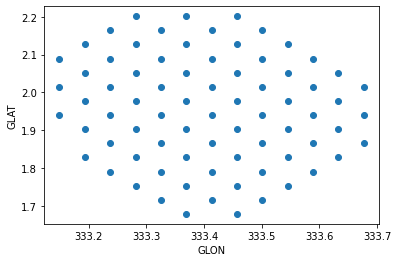

In [8]:
# stellar samples are stored in healpix pixels of nside 1024. The remaining digits refer to the pixel index at that nside
#We can grab the (l,b) coordinates of each pixel using the astropy healpix package

datasets = list(f.keys())
pixel_indices = np.array([pix.split('pixel 1024-')[-1] for pix in datasets]).astype(int)
                        
hp = HEALPix(nside=1024, order='nested', frame = Galactic())
lon, lat = hp.healpix_to_lonlat(pixel_indices)

import matplotlib.pyplot as plt
plt.scatter(lon.to(u.deg),lat.to(u.deg))
plt.xlabel("GLON")
plt.ylabel("GLAT")

#blue points mark the center of the healpix pixels corresponding to the the stellar samples in that dataset. 
#we are looking at a region in the Galactic plane towards (l,b = 333.4, 1.95)

In [3]:
# we can grab the stellar samples for the first pixel as follows
dataset = datasets[0]
print(dataset)
fpix = f[dataset]

#it contains a number of keys, including the ra and dec of the stars. 
#most important, it contains the fields "samps_dist" and "samps_red"
fpix.keys()

pixel 1024-4879415


<KeysViewHDF5 ['dec', 'labels', 'ml_av', 'ml_cov_sar', 'ml_rv', 'ml_scale', 'model_idx', 'obj_Nbands', 'obj_chi2min', 'obj_log_evid', 'obj_log_post', 'ra', 'samps_dist', 'samps_dred', 'samps_logp', 'samps_red', 'stellar_mask']>

In [4]:
# samps_dist is an array of (nstars, nsamples) where nsamples = 250. It is in units of kpc
distance_samples = fpix['samps_dist'][:]

In [5]:
# samps_red is an array of (nstars, nsamples) where nsamples = 250. It is in units of mag (in AV, or visual etinction)
extinction_samples = fpix['samps_red'][:]
extinction_samples

array([[ 5.5309005,  5.765977 ,  6.157653 , ...,  6.0535064,  5.190469 ,
         5.49651  ],
       [ 6.449215 ,  9.59615  ,  8.537481 , ...,  7.512482 ,  8.78013  ,
         8.828907 ],
       [11.988415 , 12.737083 , 12.666533 , ..., 11.920701 , 12.851462 ,
        12.8238325],
       ...,
       [ 6.079834 ,  6.6503   ,  7.4641757, ...,  7.6445465,  7.8249054,
         8.107022 ],
       [ 5.9636297,  6.226956 ,  5.8111973, ...,  6.393093 ,  6.4351344,
         6.648704 ],
       [ 6.3220963,  6.0853276,  7.068722 , ...,  7.029147 ,  6.197603 ,
         7.0086803]], dtype=float32)

In [6]:
#not all the stars have good fits. You should filter out the good stars using the stellar_mask dataset
good_stars = fpix['stellar_mask']

distance_samples_good = distance_samples[good_stars,:]
extinction_samples_good = extinction_samples[good_stars,:]

In [7]:
# and repeat for the rest of the pixels! Let's set up a telecon to chat about this if you have questions :) 